# Boston Dataset Predicting Crime Analysis 

## Libraries

In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn_pandas import DataFrameMapper
from sklearn.metrics import mean_absolute_error
from scipy.stats import gaussian_kde

## Loading data

In [2]:
bostondata=load_boston()
boston=pd.DataFrame(bostondata.data, columns=boston_dataset.feature_names)
boston['MEDV']=boston_dataset.target
#https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Analizing data

In [3]:
len(boston)

506

In [4]:
len(boston.columns)

14

In [5]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

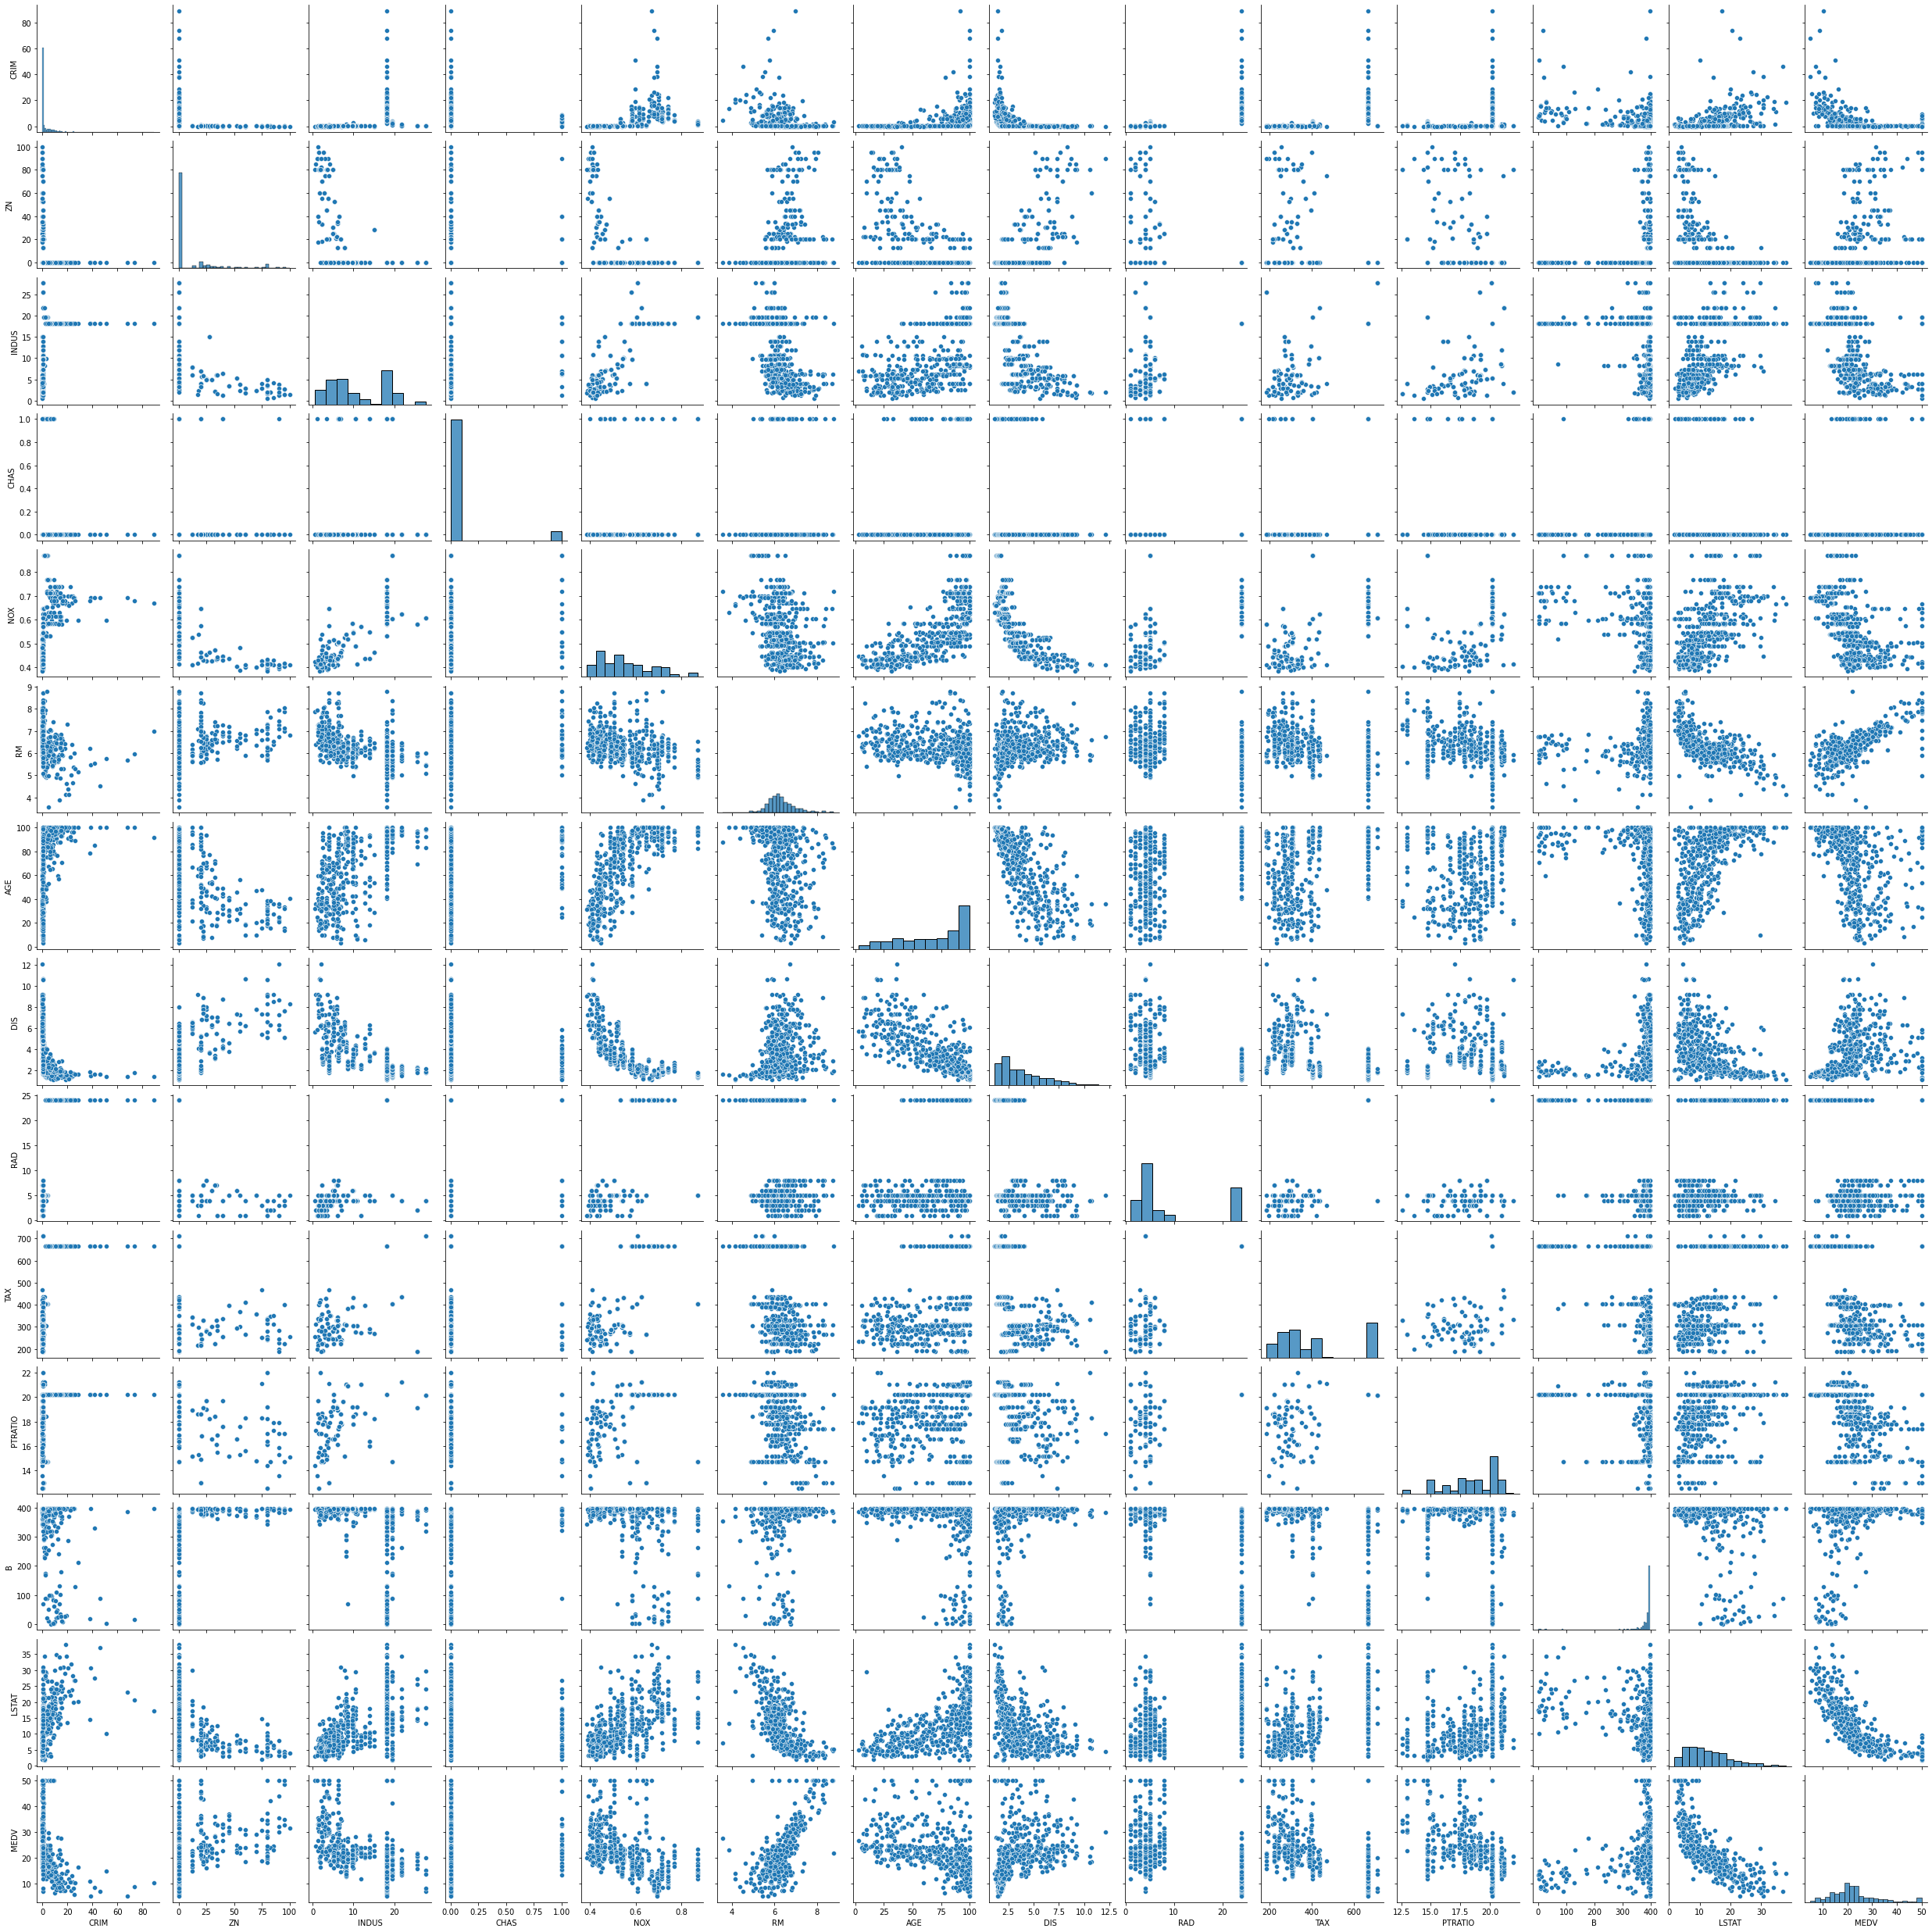

In [6]:
sns.pairplot(boston)

In [7]:
boston.columns[13]

'MEDV'

C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

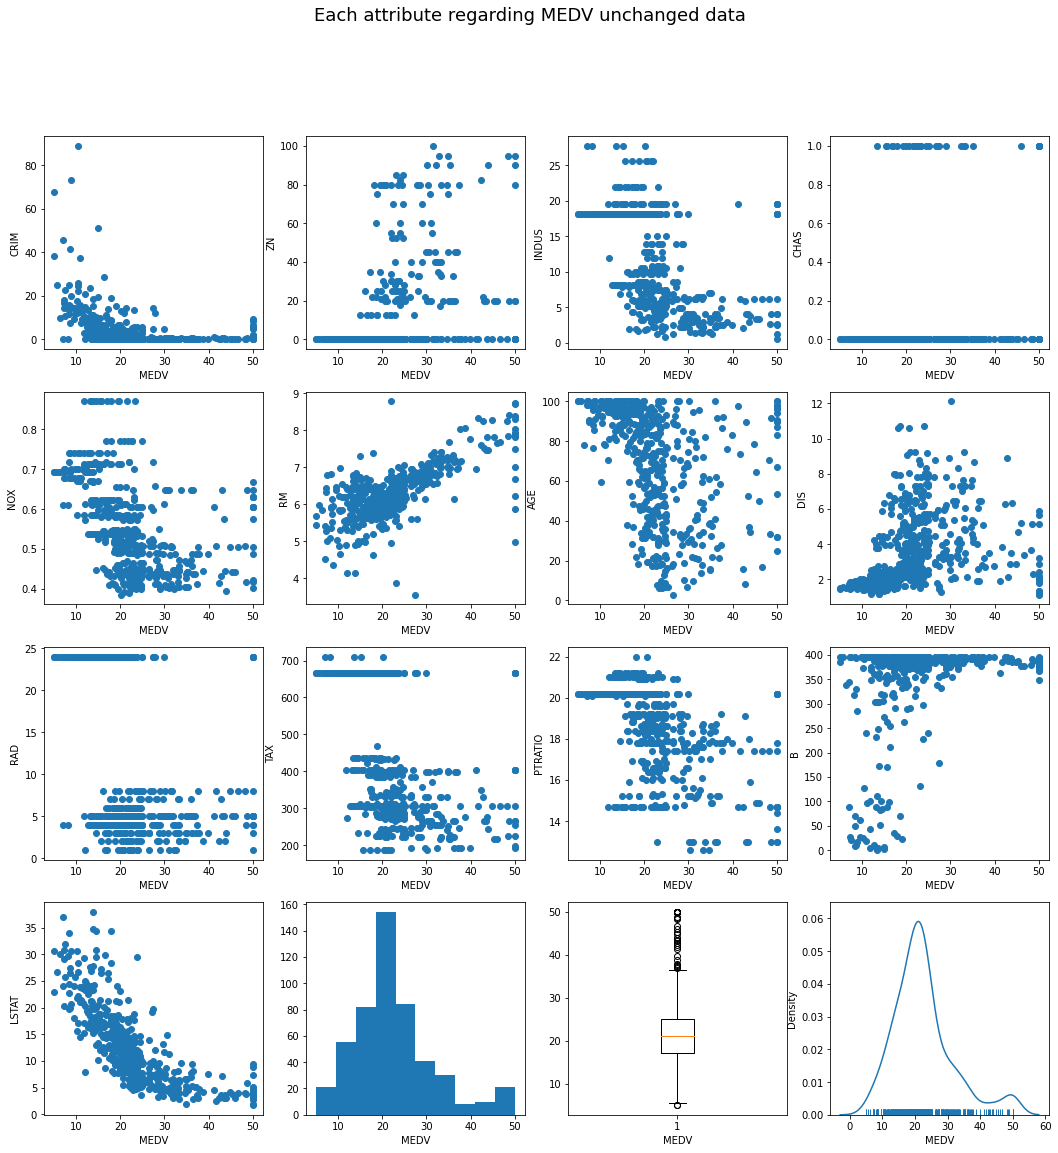

In [8]:
fig = plt.figure()
a=[]
fig, axs = plt.subplots(4,4,figsize=(18,18))
fig.suptitle('Each attribute regarding MEDV unchanged data',fontsize=18)
for i in range(len(boston.columns)-1):
    axs[int(i/4),i%4].scatter(boston[boston.columns[13]], boston[boston.columns[i]])
    axs[int(i/4),i%4].set(xlabel=boston.columns[13], ylabel=boston.columns[i])
axs[3,1].hist(boston[boston.columns[13]])
axs[3,1].set(xlabel=boston.columns[13])
axs[3,2].boxplot(boston[boston.columns[13]])
axs[3,2].set(xlabel=boston.columns[13])
#axs[3,3].plot(boston[boston.columns[13]],kind='density') # or pd.Series()
sns.distplot(boston[boston.columns[13]], hist=False, rug=True, ax=axs[3, 3])

C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

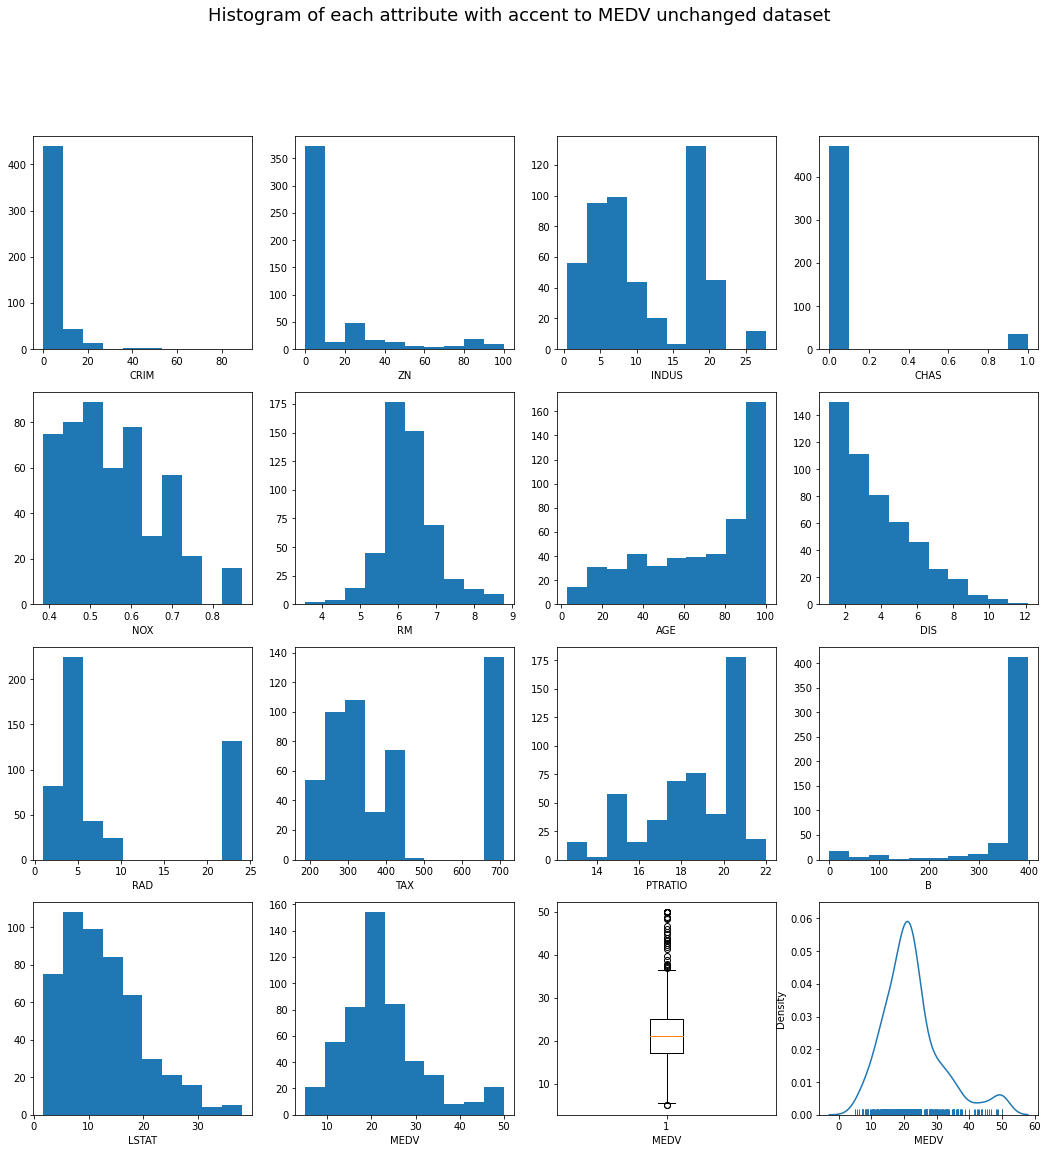

In [9]:
fig = plt.figure()
a=[]
    
fig, axs = plt.subplots(4,4,figsize=(18,18))
fig.suptitle('Histogram of each attribute with accent to MEDV unchanged dataset',fontsize=18)
for i in range(len(boston.columns)):
    axs[int(i/4),i%4].hist(boston[boston.columns[i]])
    axs[int(i/4),i%4].set(xlabel=boston.columns[i])
axs[3,2].boxplot(boston[boston.columns[13]])
axs[3,2].set(xlabel=boston.columns[13])
sns.distplot(boston[boston.columns[13]], hist=False, rug=True, ax=axs[3, 3])

C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

<Figure size 432x288 with 0 Axes>

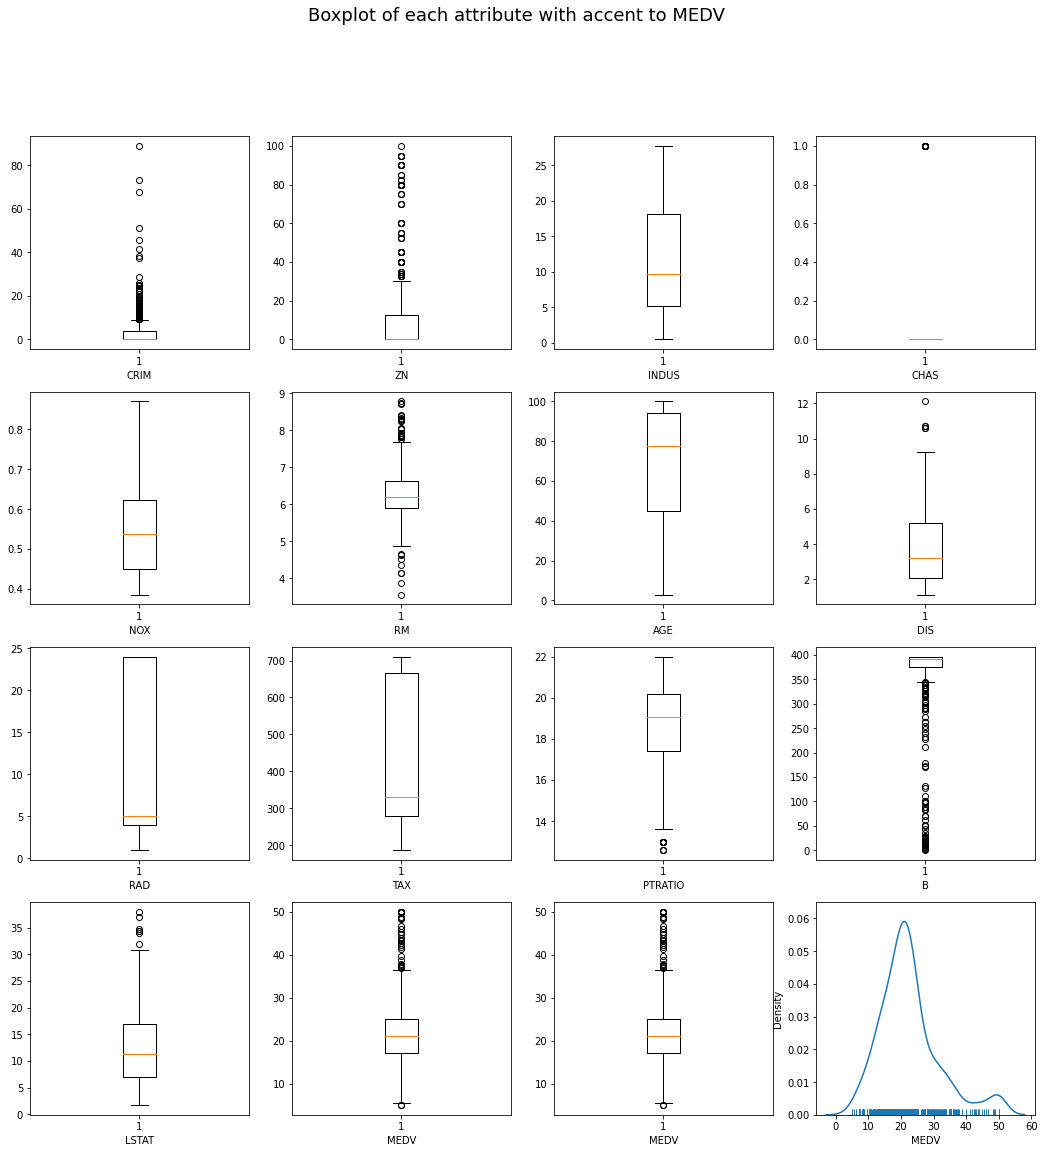

In [10]:
fig = plt.figure()
fig, axs = plt.subplots(4,4,figsize=(18,18))
fig.suptitle('Boxplot of each attribute with accent to MEDV',fontsize=18)
for i in range(len(boston.columns)):
    axs[int(i/4),i%4].boxplot(boston[boston.columns[i]])
    axs[int(i/4),i%4].set(xlabel=boston.columns[i])
axs[3,2].boxplot(boston[boston.columns[13]])
axs[3,2].set(xlabel=boston.columns[13])
sns.distplot(boston[boston.columns[13]], hist=False, rug=True, ax=axs[3, 3])

In [11]:
boston.describe(include='all')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Cathegorical values

In [13]:
for i in boston:
    if(len(set(boston[i]))<50):
        print(i,set(boston[i]))

ZN {0.0, 12.5, 17.5, 18.0, 20.0, 21.0, 22.0, 25.0, 28.0, 30.0, 33.0, 34.0, 35.0, 40.0, 45.0, 52.5, 55.0, 60.0, 70.0, 75.0, 80.0, 82.5, 85.0, 90.0, 95.0, 100.0}
CHAS {0.0, 1.0}
RAD {1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 24.0}
PTRATIO {12.6, 13.0, 14.7, 15.1, 16.1, 15.2, 18.2, 18.9, 18.5, 15.3, 17.8, 18.7, 19.2, 18.3, 21.0, 21.1, 19.7, 20.9, 21.2, 22.0, 13.6, 14.4, 14.9, 14.8, 15.6, 15.9, 15.5, 16.8, 16.6, 16.4, 16.0, 16.9, 17.9, 17.3, 17.0, 17.4, 17.6, 18.6, 18.0, 18.4, 18.8, 19.0, 19.1, 19.6, 20.2, 20.1}


### Counting outliers

In [14]:
aoutl=[]
for i in boston:
    qh,ql=np.percentile(boston.loc[:,i],[75,25])
    lb= ql-(1.5*(qh-ql))
    ub= qh+(1.5*(qh-ql))
    outliers= boston[i][(boston[i]<lb)|(boston[i]>ub)]
    aoutl.append([i,boston[i][(boston[i]<lb)],boston[i][(boston[i]>ub)]])
    print("Total number of outliers for "+i+" is "+str(len(outliers))+" or "+str(round(len(outliers)/len(boston)*100))+"%")

Total number of outliers for CRIM is 66 or 13%
Total number of outliers for ZN is 68 or 13%
Total number of outliers for INDUS is 0 or 0%
Total number of outliers for CHAS is 35 or 7%
Total number of outliers for NOX is 0 or 0%
Total number of outliers for RM is 30 or 6%
Total number of outliers for AGE is 0 or 0%
Total number of outliers for DIS is 5 or 1%
Total number of outliers for RAD is 0 or 0%
Total number of outliers for TAX is 0 or 0%
Total number of outliers for PTRATIO is 15 or 3%
Total number of outliers for B is 77 or 15%
Total number of outliers for LSTAT is 7 or 1%
Total number of outliers for MEDV is 40 or 8%


In [15]:
aoutl[5][1].sort_values(ascending=False)

386    4.652
412    4.628
414    4.519
384    4.368
374    4.138
406    4.138
367    3.863
365    3.561
Name: RM, dtype: float64

In [16]:
bostonOriginal=boston.copy()
len(bostonOriginal)

506

In [17]:
#boston=bostonOriginal.copy()

In [18]:
for i in aoutl:
    lb=i[1].copy()
    hb=i[2].copy()
    lb=lb.sort_values(ascending=True)
    hb=hb.sort_values(ascending=False)
    #print(len(lb))
    
    if len(lb)>0:
        #print(lb)
        for ind in lb[:int(min(len(lb),len(boston["MEDV"])/20))].index:
            try:
                boston.drop(index=ind, inplace=True)
            except:
                pass
    if len(hb)>0:
        for ind in hb[:int(min(len(hb),len(boston["MEDV"])/20))].index: 
            try:
                boston.drop(index=ind, inplace=True)
            except:
                pass 

In [19]:
len(boston)

382

In [20]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Correlation tests

In [21]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.243708,0.527020,-0.075361,0.592171,-0.121387,0.425314,-0.473137,0.868824,0.793023,0.329316,-0.365870,0.475735,-0.441734
ZN,-0.243708,1.000000,-0.454845,-0.075265,-0.472669,0.292586,-0.494527,0.595346,-0.219143,-0.235201,-0.359585,0.145968,-0.378689,0.339685
INDUS,0.527020,-0.454845,1.000000,0.011738,0.749152,-0.342312,0.592728,-0.698692,0.510544,0.669007,0.278152,-0.308295,0.579119,-0.523912
CHAS,-0.075361,-0.075265,0.011738,1.000000,-0.034755,-0.040950,0.078720,-0.054221,-0.066926,-0.100268,-0.114016,0.043729,0.067821,0.047884
NOX,0.592171,-0.472669,0.749152,-0.034755,1.000000,-0.314801,0.687488,-0.753968,0.558900,0.643861,0.172885,-0.365829,0.589525,-0.513974
RM,-0.121387,0.292586,-0.342312,-0.040950,-0.314801,1.000000,-0.235912,0.221171,-0.048114,-0.151377,-0.135454,0.047838,-0.597530,0.648933
AGE,0.425314,-0.494527,0.592728,0.078720,0.687488,-0.235912,1.000000,-0.693744,0.359250,0.446046,0.268177,-0.253439,0.628590,-0.514620
DIS,-0.473137,0.595346,-0.698692,-0.054221,-0.753968,0.221171,-0.693744,1.000000,-0.413965,-0.510127,-0.255358,0.273748,-0.491937,0.338725
RAD,0.868824,-0.219143,0.510544,-0.066926,0.558900,-0.048114,0.359250,-0.413965,1.000000,0.883156,0.387237,-0.314648,0.385436,-0.367644
TAX,0.793023,-0.235201,0.669007,-0.100268,0.643861,-0.151377,0.446046,-0.510127,0.883156,1.000000,0.371000,-0.338881,0.465886,-0.485197


Text(0.5, 1.0, 'Correlation of parameters')

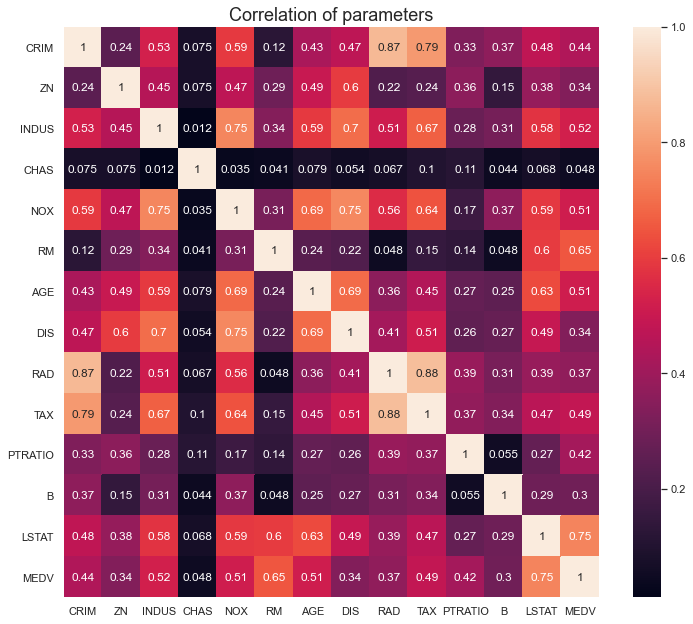

In [22]:
sns.set(rc={'figure.figsize':(12,10.5)})
correlation_matrix = boston.corr()
ax=plt.axes()
sns.heatmap(data=abs(correlation_matrix), annot=True)
ax.set_title('Correlation of parameters',fontsize=18)

### Testing log scaling

In [23]:
boston2=boston.copy()

In [24]:
bostonOriginal.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [25]:
for x in boston2.columns[:-1]:
    boston2[x]=np.log2(boston2[x]+1)

In [26]:
boston2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.009089,4.247928,1.726831,0.0,0.621056,2.921246,6.048759,2.347666,1.000000,8.214319,4.026800,8.636262,2.580145,24.0
1,0.038872,0.000000,3.012569,0.0,0.554834,2.891614,6.320124,2.577030,1.584963,7.924813,4.232661,8.636262,3.341986,21.6
2,0.038844,0.000000,3.012569,0.0,0.554834,3.032982,5.956521,2.577030,1.584963,7.924813,4.232661,8.621429,2.330558,34.7
3,0.045960,0.000000,1.669027,0.0,0.543991,2.999639,5.548437,2.820118,2.000000,7.800900,4.300124,8.628008,1.978196,33.4
4,0.096329,0.000000,1.669027,0.0,0.543991,3.026269,5.786596,2.820118,2.000000,7.800900,4.300124,8.636262,2.662205,36.2


In [27]:
boston2.corr()[abs(boston2.corr())-abs(boston.corr())>0]["MEDV"]

CRIM      -0.482124
ZN         0.344369
INDUS     -0.568998
CHAS            NaN
NOX       -0.519545
RM              NaN
AGE             NaN
DIS        0.383680
RAD             NaN
TAX       -0.490988
PTRATIO         NaN
B               NaN
LSTAT     -0.786011
MEDV            NaN
Name: MEDV, dtype: float64

In [28]:
(abs(boston2.corr())-abs(boston.corr()))[abs(boston2.corr())-abs(boston.corr())>0]["MEDV"]

CRIM       0.040390
ZN         0.004684
INDUS      0.045086
CHAS            NaN
NOX        0.005572
RM              NaN
AGE             NaN
DIS        0.044955
RAD             NaN
TAX        0.005791
PTRATIO         NaN
B               NaN
LSTAT      0.040669
MEDV            NaN
Name: MEDV, dtype: float64

C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\ktenev\Anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MEDV', ylabel='Density'>

<Figure size 864x756 with 0 Axes>

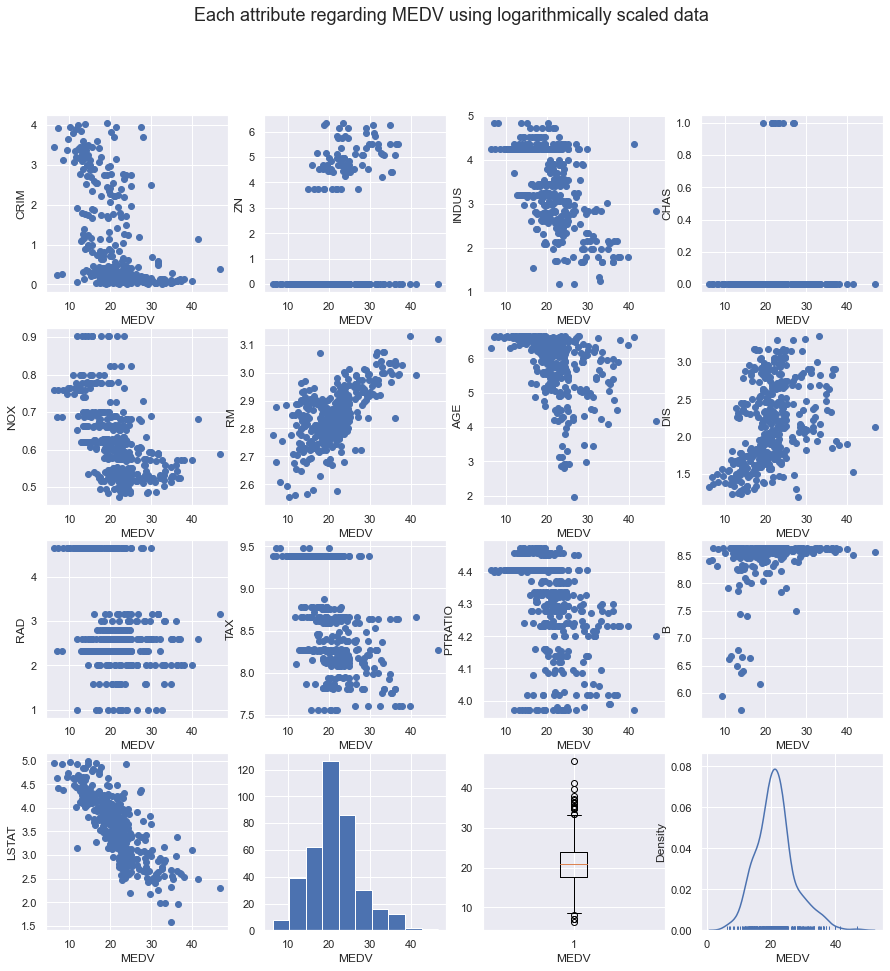

In [29]:
fig = plt.figure()
a=[]
fig, axs = plt.subplots(4,4,figsize=(15,15))
for i in range(len(boston2.columns)-1):
    #a.append(fig.add_subplot(110+i))
    
    
    fig.suptitle('Each attribute regarding MEDV using logarithmically scaled data',fontsize=18)
    axs[int(i/4),i%4].scatter(boston2[boston2.columns[13]], boston2[boston2.columns[i]])
    axs[int(i/4),i%4].set(xlabel=boston2.columns[13], ylabel=boston2.columns[i])
axs[3,1].hist(boston2[boston2.columns[13]])
axs[3,1].set(xlabel=boston2.columns[13])
axs[3,2].boxplot(boston2[boston2.columns[13]])
axs[3,2].set(xlabel=boston2.columns[13])
#axs[3,3].plot(boston[boston.columns[13]],kind='density') # or pd.Series()
sns.distplot(boston2[boston2.columns[13]], hist=False, rug=True, ax=axs[3, 3])

In [30]:
boston3=boston.copy()

In [31]:
bostonBetterCorr=(abs(boston2.corr())-abs(boston.corr()))[abs(boston2.corr())-abs(boston.corr())>0]["MEDV"]

In [32]:
bostonBetterCorr[bostonBetterCorr.notnull()]

CRIM     0.040390
ZN       0.004684
INDUS    0.045086
NOX      0.005572
DIS      0.044955
TAX      0.005791
LSTAT    0.040669
Name: MEDV, dtype: float64

In [33]:
boston2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.009089,4.247928,1.726831,0.0,0.621056,2.921246,6.048759,2.347666,1.000000,8.214319,4.026800,8.636262,2.580145,24.0
1,0.038872,0.000000,3.012569,0.0,0.554834,2.891614,6.320124,2.577030,1.584963,7.924813,4.232661,8.636262,3.341986,21.6
2,0.038844,0.000000,3.012569,0.0,0.554834,3.032982,5.956521,2.577030,1.584963,7.924813,4.232661,8.621429,2.330558,34.7
3,0.045960,0.000000,1.669027,0.0,0.543991,2.999639,5.548437,2.820118,2.000000,7.800900,4.300124,8.628008,1.978196,33.4
4,0.096329,0.000000,1.669027,0.0,0.543991,3.026269,5.786596,2.820118,2.000000,7.800900,4.300124,8.636262,2.662205,36.2


In [34]:
boston3[bostonBetterCorr[bostonBetterCorr.notnull()].index]=boston2[bostonBetterCorr[bostonBetterCorr.notnull()].index].copy()

In [35]:
boston3

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.009089,4.247928,1.726831,0.0,0.621056,6.575,65.2,2.347666,1.0,8.214319,15.3,396.90,2.580145,24.0
1,0.038872,0.000000,3.012569,0.0,0.554834,6.421,78.9,2.577030,2.0,7.924813,17.8,396.90,3.341986,21.6
2,0.038844,0.000000,3.012569,0.0,0.554834,7.185,61.1,2.577030,2.0,7.924813,17.8,392.83,2.330558,34.7
3,0.045960,0.000000,1.669027,0.0,0.543991,6.998,45.8,2.820118,3.0,7.800900,18.7,394.63,1.978196,33.4
4,0.096329,0.000000,1.669027,0.0,0.543991,7.147,54.2,2.820118,3.0,7.800900,18.7,396.90,2.662205,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.087639,0.000000,3.692650,0.0,0.653519,6.593,69.1,1.798507,1.0,8.098032,21.0,391.99,3.415488,22.4
502,0.063876,0.000000,3.692650,0.0,0.653519,6.120,76.7,1.716991,1.0,8.098032,21.0,396.90,3.333424,20.6
503,0.085098,0.000000,3.692650,0.0,0.653519,6.976,91.0,1.663345,1.0,8.098032,21.0,396.90,2.731183,23.9
504,0.150027,0.000000,3.692650,0.0,0.653519,6.794,89.3,1.760817,1.0,8.098032,21.0,393.45,2.903038,22.0


In [36]:
boston3.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.355569,0.621127,-0.076114,0.719947,-0.167464,0.505423,-0.591338,0.908313,0.809462,0.329919,-0.415286,0.511610,-0.482124
ZN,-0.355569,1.000000,-0.539708,-0.086584,-0.530649,0.286440,-0.502250,0.629885,-0.239194,-0.273131,-0.372273,0.170432,-0.429515,0.344369
INDUS,0.621127,-0.539708,1.000000,0.043598,0.737283,-0.396128,0.570020,-0.714003,0.515573,0.635826,0.316841,-0.299764,0.621219,-0.568998
CHAS,-0.076114,-0.086584,0.043598,1.000000,-0.031144,-0.040950,0.078720,-0.034268,-0.066926,-0.094681,-0.114016,0.043729,0.074045,0.047884
NOX,0.719947,-0.530649,0.737283,-0.031144,1.000000,-0.315630,0.701198,-0.818171,0.565934,0.639786,0.194017,-0.364700,0.595074,-0.519545
RM,-0.167464,0.286440,-0.396128,-0.040950,-0.315630,1.000000,-0.235912,0.243050,-0.048114,-0.163354,-0.135454,0.047838,-0.634275,0.648933
AGE,0.505423,-0.502250,0.570020,0.078720,0.701198,-0.235912,1.000000,-0.722676,0.359250,0.433910,0.268177,-0.253439,0.660384,-0.514620
DIS,-0.591338,0.629885,-0.714003,-0.034268,-0.818171,0.243050,-0.722676,1.000000,-0.446887,-0.539866,-0.244755,0.300836,-0.542828,0.383680
RAD,0.908313,-0.239194,0.515573,-0.066926,0.565934,-0.048114,0.359250,-0.446887,1.000000,0.830377,0.387237,-0.314648,0.394778,-0.367644
TAX,0.809462,-0.273131,0.635826,-0.094681,0.639786,-0.163354,0.433910,-0.539866,0.830377,1.000000,0.330920,-0.336347,0.466074,-0.490988


# Models for data predictions

## Linear models

## Linear models original dataset

### Linear model best correlation parameters original dataset

In [37]:
correlation_matrix.MEDV[correlation_matrix.MEDV[abs(correlation_matrix['MEDV'])>0.5].abs().sort_values(ascending=False).index]
#LSTAT     -0.737663
#RM         0.695360

MEDV     1.000000
LSTAT   -0.745342
RM       0.648933
INDUS   -0.523912
AGE     -0.514620
NOX     -0.513974
Name: MEDV, dtype: float64

In [38]:
boston2.corr().MEDV[boston2.corr().MEDV[abs(boston2.corr()['MEDV'])>0.5].abs().sort_values(ascending=False).index]

MEDV     1.000000
LSTAT   -0.786011
RM       0.638965
INDUS   -0.568998
NOX     -0.519545
Name: MEDV, dtype: float64

#### linear model best correlation parameters original dataset

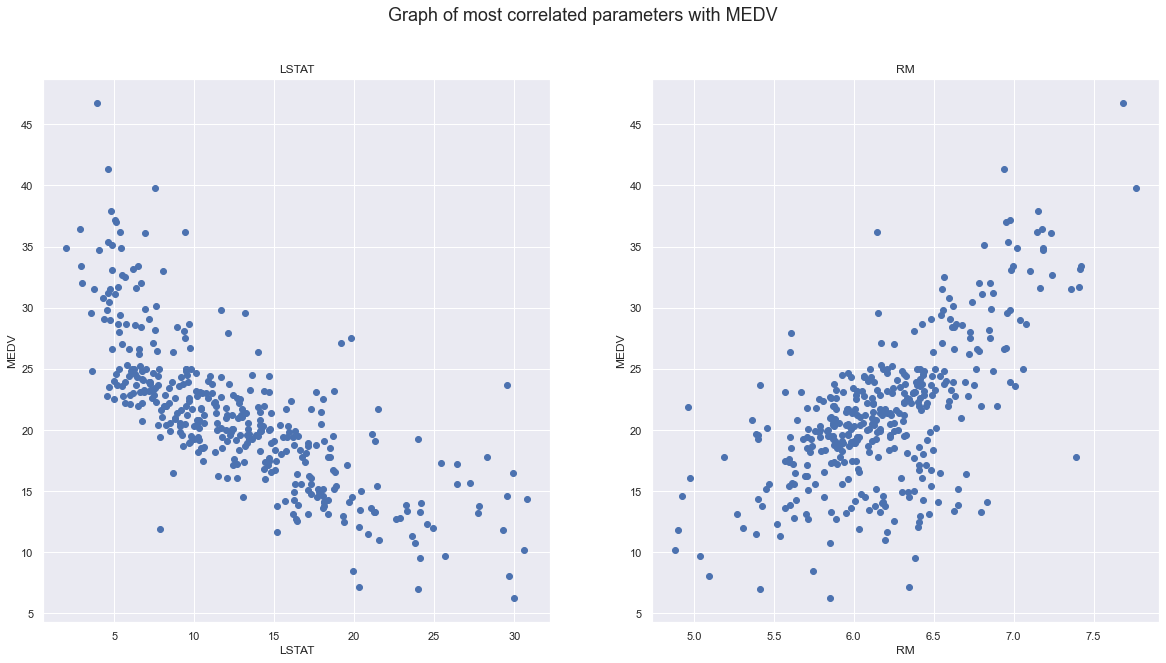

In [39]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['LSTAT', 'RM']):
    plt.subplot(1, 2 , i+1)
    x = boston[col]
    y = boston['MEDV']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.suptitle("Graph of most correlated parameters with MEDV",fontsize=18)
    plt.ylabel('MEDV')

In [40]:
X_train2dim, X_test2dim, Y_train2dim, Y_test2dim = train_test_split(boston[['LSTAT', 'RM']], boston['MEDV'], test_size = 0.2, random_state=42)
print(X_train2dim.shape)
print(X_test2dim.shape)
print(Y_train2dim.shape)
print(Y_test2dim.shape)

(305, 2)
(77, 2)
(305,)
(77,)


In [41]:
lin_model2dim = LinearRegression()
lin_model2dim.fit(X_train2dim, Y_train2dim)

LinearRegression()

In [42]:
ypred_tr2dim = lin_model2dim.predict(X_train2dim)
mse_tr2dim=mean_squared_error(Y_train2dim, ypred_tr2dim)
rmse_tr2dim = np.sqrt(mse_tr2dim)
mae_tr2dim=mean_absolute_error(Y_train2dim, ypred_tr2dim)
r2_tr2dim = r2_score(Y_train2dim, ypred_tr2dim)

ypred_te2dim = lin_model2dim.predict(X_test2dim)
mse_te2dim=mean_squared_error(Y_test2dim, ypred_te2dim)
rmse_te2dim = np.sqrt(mse_te2dim)
mae_te2dim=mean_absolute_error(Y_test2dim, ypred_te2dim)
r2_te2dim = r2_score(Y_test2dim, ypred_te2dim)

print("Model training performance:\n")
print('MSE is {}'.format(mse_tr2dim))
print('RMSE is {}'.format(rmse_tr2dim))
print('MAE is {}'.format(mae_tr2dim))
print('R2 score is {}'.format(r2_tr2dim))
print("\n")

print("Model test performance:\n")
print('MSE is {}'.format(mse_te2dim))
print('RMSE is {}'.format(rmse_te2dim))
print('MAE is {}'.format(mae_te2dim))
print('R2 score is {}'.format(r2_te2dim))


Model training performance:

MSE is 14.568336571781778
RMSE is 3.8168490370699466
MAE is 2.912451318540548
R2 score is 0.5950026685778169


Model test performance:

MSE is 11.134619904768769
RMSE is 3.3368577891137
MAE is 2.4284590025419126
R2 score is 0.7100805853612505


#### linear model all parameters original dataset

In [43]:
X_train_All_dim, X_test_All_dim, Y_train_All_dim, Y_test_All_dim = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'], test_size = 0.2, random_state=42)
print(X_train_All_dim.shape)
print(X_test_All_dim.shape)
print(Y_train_All_dim.shape)
print(Y_test_All_dim.shape)

(305, 13)
(77, 13)
(305, 1)
(77, 1)


In [44]:
X_train_All_dim.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
179,0.05780,0.0,2.46,0.0,0.488,6.980,58.4,2.8290,3.0,193.0,17.8,396.90,5.04
434,13.91340,0.0,18.10,0.0,0.713,6.208,95.0,2.2222,24.0,666.0,20.2,100.63,15.17
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
99,0.06860,0.0,2.89,0.0,0.445,7.416,62.5,3.4952,2.0,276.0,18.0,396.90,6.19
294,0.08199,0.0,13.92,0.0,0.437,6.009,42.3,5.5027,4.0,289.0,16.0,396.90,10.40


In [45]:
lin_model_All_dim = LinearRegression()
lin_model_All_dim.fit(X_train_All_dim, Y_train_All_dim)

LinearRegression()

In [46]:
ypred_tr_All_dim = lin_model_All_dim.predict(X_train_All_dim)
mse_tr_All_dim=mean_squared_error(Y_train_All_dim, ypred_tr_All_dim)
rmse_tr_All_dim = np.sqrt(mse_tr_All_dim)
mae_tr_All_dim=mean_absolute_error(Y_train_All_dim, ypred_tr_All_dim)
r2_tr_All_dim = r2_score(Y_train_All_dim, ypred_tr_All_dim)

ypred_te_All_dim = lin_model_All_dim.predict(X_test_All_dim)
mse_te_All_dim=mean_squared_error(Y_test_All_dim, ypred_te_All_dim)
rmse_te_All_dim = np.sqrt(mse_te_All_dim)
mae_te_All_dim=mean_absolute_error(Y_test_All_dim, ypred_te_All_dim)
r2_te_All_dim = r2_score(Y_test_All_dim, ypred_te_All_dim)

print("Model training performance:\n")
print('MSE is {}'.format(mse_tr_All_dim))
print('RMSE is {}'.format(rmse_tr_All_dim))
print('MAE is {}'.format(mae_tr_All_dim))
print('R2 score is {}'.format(r2_tr_All_dim))
print("\n")

print("Model test performance:\n")
print('MSE is {}'.format(mse_te_All_dim))
print('RMSE is {}'.format(rmse_te_All_dim))
print('MAE is {}'.format(mae_te_All_dim))
print('R2 score is {}'.format(r2_te_All_dim))

Model training performance:

MSE is 9.595530023861405
RMSE is 3.0976652536808116
MAE is 2.3004199515572514
R2 score is 0.7332458627587838


Model test performance:

MSE is 7.31765408270089
RMSE is 2.7051162789612
MAE is 2.0430414235300276
R2 score is 0.8094654324682532


#### all parameters scaled original dataset

In [47]:
mapper = DataFrameMapper([(boston.columns, StandardScaler())])
scaled_features = mapper.fit_transform(boston.copy())
bostonS = pd.DataFrame(scaled_features, index=boston.index, columns=boston.columns)
#bostonS=scaler.fit_transform(boston)
#bostonS
bostonS

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.550528,0.643443,-1.325272,-0.163956,-0.068890,0.785575,-0.083847,0.121146,-0.933549,-0.607118,-1.744867,0.431796,-1.249934,0.441007
1,-0.544472,-0.459053,-0.609625,-0.163956,-0.705861,0.462688,0.410803,0.593330,-0.808465,-0.949023,-0.439565,0.431796,-0.562965,0.043802
2,-0.544478,-0.459053,-0.609625,-0.163956,-0.705861,2.064541,-0.231881,0.593330,-0.808465,-0.949023,-0.439565,0.363894,-1.406813,2.211883
3,-0.543012,-0.459053,-1.344817,-0.163956,-0.807407,1.672465,-0.784301,1.182873,-0.683380,-1.075654,0.030343,0.393925,-1.586812,1.996730
4,-0.532429,-0.459053,-1.344817,-0.163956,-0.807407,1.984868,-0.481011,1.182873,-0.683380,-1.075654,0.030343,0.431796,-1.192136,2.460136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.534281,-0.459053,0.121056,-0.163956,0.254211,0.823315,0.056966,-0.746346,-0.933549,-0.752744,1.231220,0.349880,-0.475442,0.176204
502,-0.539290,-0.459053,0.121056,-0.163956,0.254211,-0.168408,0.331370,-0.849224,-0.933549,-0.752744,1.231220,0.431796,-0.572873,-0.121701
503,-0.534821,-0.459053,0.121056,-0.163956,0.254211,1.626338,0.847684,-0.913826,-0.933549,-0.752744,1.231220,0.431796,-1.140943,0.424457
504,-0.520731,-0.459053,0.121056,-0.163956,0.254211,1.244745,0.786304,-0.794636,-0.933549,-0.752744,1.231220,0.374238,-1.002229,0.110003


In [48]:
X_train_All_dim_scaled, X_test_All_dim_scaled, Y_train_All_dim_scaled, Y_test_All_dim_scaled = train_test_split(bostonS.loc[:, bostonS.columns != "MEDV"], boston.loc[:, bostonS.columns == 'MEDV'], test_size = 0.2, random_state=42)
print(X_train_All_dim.shape)
print(X_test_All_dim.shape)
print(Y_train_All_dim.shape)
print(Y_test_All_dim.shape)

(305, 13)
(77, 13)
(305, 1)
(77, 1)


In [49]:
lin_model_All_dim_scaled = LinearRegression()
lin_model_All_dim_scaled.fit(X_train_All_dim_scaled, Y_train_All_dim_scaled)

LinearRegression()

In [50]:
ypred_tr_All_dim_scaled = lin_model_All_dim_scaled.predict(X_train_All_dim_scaled)
mse_tr_All_dim_scaled=mean_squared_error(Y_train_All_dim_scaled, ypred_tr_All_dim_scaled)
rmse_tr_All_dim_scaled = np.sqrt(mse_tr_All_dim_scaled)
mae_tr_All_dim_scaled=mean_absolute_error(Y_train_All_dim_scaled, ypred_tr_All_dim_scaled)
r2_tr_All_dim_scaled = r2_score(Y_train_All_dim_scaled, ypred_tr_All_dim_scaled)

ypred_te_All_dim_scaled = lin_model_All_dim_scaled.predict(X_test_All_dim_scaled)
mse_te_All_dim_scaled=mean_squared_error(Y_test_All_dim_scaled, ypred_te_All_dim_scaled)
rmse_te_All_dim_scaled = np.sqrt(mse_te_All_dim_scaled)
mae_te_All_dim_scaled=mean_absolute_error(Y_test_All_dim_scaled, ypred_te_All_dim_scaled)
r2_te_All_dim_scaled = r2_score(Y_test_All_dim_scaled, ypred_te_All_dim_scaled)

print("Model training performance:\n")
print('MSE is {}'.format(mse_tr_All_dim_scaled))
print('RMSE is {}'.format(rmse_tr_All_dim_scaled))
print('MAE is {}'.format(mae_tr_All_dim_scaled))
print('R2 score is {}'.format(r2_tr_All_dim_scaled))
print("\n")

print("Model test performance:\n")
print('MSE is {}'.format(mse_te_All_dim_scaled))
print('RMSE is {}'.format(rmse_te_All_dim_scaled))
print('MAE is {}'.format(mae_te_All_dim_scaled))
print('R2 score is {}'.format(r2_te_All_dim_scaled))

Model training performance:

MSE is 9.595530023861407
RMSE is 3.0976652536808116
MAE is 2.3004199515572563
R2 score is 0.7332458627587837


Model test performance:

MSE is 7.317654082700853
RMSE is 2.7051162789611936
MAE is 2.043041423530022
R2 score is 0.8094654324682542


## Linear models improved dataset

### Linear model best correlation parameters improved dataset

In [51]:
boston3.corr().MEDV[correlation_matrix.MEDV[abs(correlation_matrix['MEDV'])>0.5].abs().sort_values(ascending=False).index]
#LSTAT     -0.737663
#RM         0.695360

MEDV     1.000000
LSTAT   -0.786011
RM       0.648933
INDUS   -0.568998
AGE     -0.514620
NOX     -0.519545
Name: MEDV, dtype: float64

In [52]:
boston3.corr().MEDV[boston3.corr().MEDV[abs(boston3.corr()['MEDV'])>0.5].abs().sort_values(ascending=False).index]

MEDV     1.000000
LSTAT   -0.786011
RM       0.648933
INDUS   -0.568998
NOX     -0.519545
AGE     -0.514620
Name: MEDV, dtype: float64

#### linear model best correlation parameters improved dataset

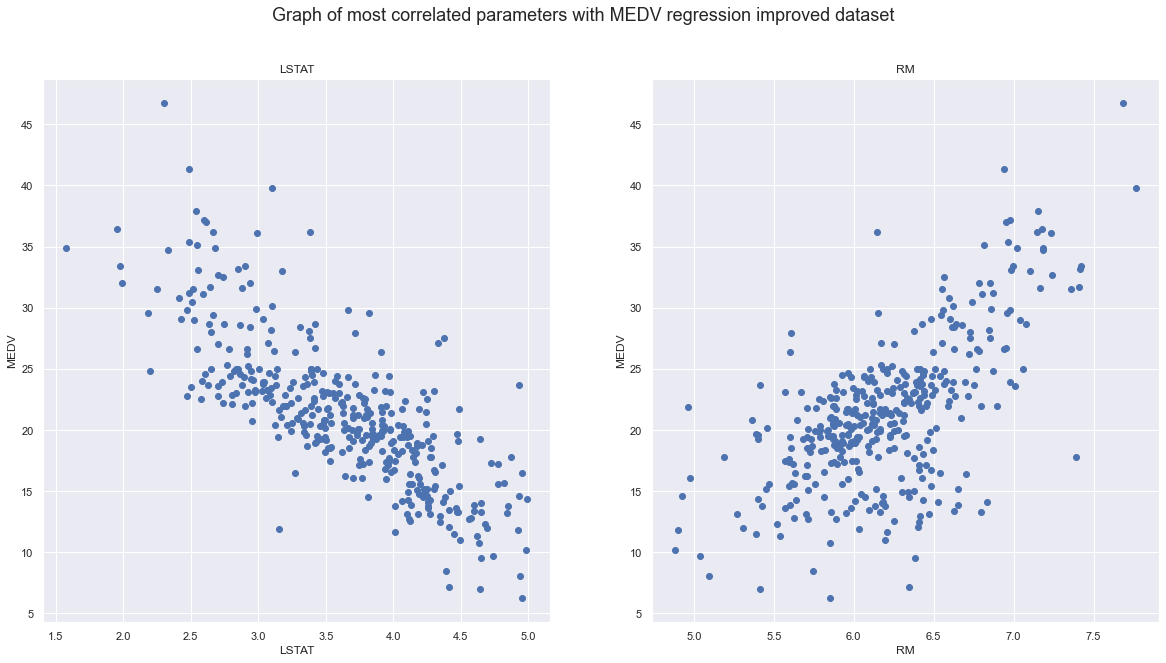

In [53]:
plt.figure(figsize=(20,10))
for i, col in enumerate(['LSTAT', 'RM']):
    plt.subplot(1, 2 , i+1)
    x = boston3[col]
    y = boston3['MEDV']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.suptitle("Graph of most correlated parameters with MEDV regression improved dataset",fontsize=18)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [54]:
X_train2dim3, X_test2dim3, Y_train2dim3, Y_test2dim3 = train_test_split(boston3[['LSTAT', 'RM']], boston3['MEDV'], test_size = 0.2, random_state=42)
print(X_train2dim3.shape)
print(X_test2dim3.shape)
print(Y_train2dim3.shape)
print(Y_test2dim3.shape)

(305, 2)
(77, 2)
(305,)
(77,)


In [55]:
lin_model2dim3 = LinearRegression()
lin_model2dim3.fit(X_train2dim3, Y_train2dim3)

LinearRegression()

In [56]:
ypred_tr2dim3 = lin_model2dim3.predict(X_train2dim3)
mse_tr2dim3=mean_squared_error(Y_train2dim3, ypred_tr2dim3)
rmse_tr2dim3 = np.sqrt(mse_tr2dim3)
mae_tr2dim3=mean_absolute_error(Y_train2dim3, ypred_tr2dim3)
r2_tr2dim3 = r2_score(Y_train2dim3, ypred_tr2dim3)

ypred_te2dim3 = lin_model2dim3.predict(X_test2dim3)
mse_te2dim3=mean_squared_error(Y_test2dim3, ypred_te2dim3)
rmse_te2dim3 = np.sqrt(mse_te2dim3)
mae_te2dim3=mean_absolute_error(Y_test2dim3, ypred_te2dim3)
r2_te2dim3 = r2_score(Y_test2dim3, ypred_te2dim3)

print("Model training performance:\n")
print('MSE is {}'.format(mse_tr2dim3))
print('RMSE is {}'.format(rmse_tr2dim3))
print('MAE is {}'.format(mae_tr2dim3))
print('R2 score is {}'.format(r2_tr2dim3))
print("\n")

print("Model test performance:\n")
print('MSE is {}'.format(mse_te2dim3))
print('RMSE is {}'.format(rmse_te2dim3))
print('MAE is {}'.format(mae_te2dim3))
print('R2 score is {}'.format(r2_te2dim3))


Model training performance:

MSE is 13.02881226696745
RMSE is 3.6095446065906223
MAE is 2.78553510278052
R2 score is 0.6378011879583407


Model test performance:

MSE is 10.771545932331989
RMSE is 3.2820033413042085
MAE is 2.426097559722329
R2 score is 0.7195341809450885


#### linear model all parameters improved dataset

In [57]:
X_train_All_dim3, X_test_All_dim3, Y_train_All_dim3, Y_test_All_dim3 = train_test_split(boston3.loc[:, boston3.columns != "MEDV"], boston.loc[:, boston3.columns == 'MEDV'], test_size = 0.2, random_state=42)
print(X_train_All_dim3.shape)
print(X_test_All_dim3.shape)
print(Y_train_All_dim3.shape)
print(Y_test_All_dim3.shape)

(305, 13)
(77, 13)
(305, 1)
(77, 1)


In [58]:
X_train_All_dim3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
179,0.081067,0.000000,1.790772,0.0,0.573375,6.980,58.4,1.936968,3.0,7.599913,17.8,396.90,2.594549
434,3.898537,0.000000,4.255501,0.0,0.776525,6.208,95.0,1.688046,24.0,9.381543,20.2,100.63,4.015248
270,0.377579,4.392317,2.992768,0.0,0.549916,5.856,42.1,2.440686,3.0,7.807355,18.6,388.65,3.807355
99,0.095722,0.000000,1.959770,0.0,0.531069,7.416,62.5,2.168385,2.0,8.113742,18.0,396.90,2.845992
294,0.113687,0.000000,3.899176,0.0,0.523060,6.009,42.3,2.701039,4.0,8.179909,16.0,396.90,3.510962


In [59]:
lin_model_All_dim3 = LinearRegression()
lin_model_All_dim3.fit(X_train_All_dim3, Y_train_All_dim3)

LinearRegression()

In [60]:
ypred_tr_All_dim3 = lin_model_All_dim3.predict(X_train_All_dim3)
mse_tr_All_dim3=mean_squared_error(Y_train_All_dim3, ypred_tr_All_dim3)
rmse_tr_All_dim3 = np.sqrt(mse_tr_All_dim3)
mae_tr_All_dim3=mean_absolute_error(Y_train_All_dim3, ypred_tr_All_dim3)
r2_tr_All_dim3 = r2_score(Y_train_All_dim3, ypred_tr_All_dim3)

ypred_te_All_dim3 = lin_model_All_dim3.predict(X_test_All_dim3)
mse_te_All_dim3 = mean_squared_error(Y_test_All_dim3, ypred_te_All_dim3)
rmse_te_All_dim3 = np.sqrt(mse_te_All_dim3)
mae_te_All_dim3 = mean_absolute_error(Y_test_All_dim3, ypred_te_All_dim3)
r2_te_All_dim3 = r2_score(Y_test_All_dim3, ypred_te_All_dim3)

print("Model training performance:\n")
print('MSE is {}'.format(mse_tr_All_dim3))
print('RMSE is {}'.format(rmse_tr_All_dim3))
print('MAE is {}'.format(mae_tr_All_dim3))
print('R2 score is {}'.format(r2_tr_All_dim3))
print("\n")

print("Model test performance:\n")
print('MSE is {}'.format(mse_te_All_dim3))
print('RMSE is {}'.format(rmse_te_All_dim3))
print('MAE is {}'.format(mae_te_All_dim3))
print('R2 score is {}'.format(r2_te_All_dim3))

Model training performance:

MSE is 9.075030396100733
RMSE is 3.0124791113135925
MAE is 2.273294205587909
R2 score is 0.7477156657600148


Model test performance:

MSE is 6.875703963694547
RMSE is 2.62215635759856
MAE is 1.949177036259257
R2 score is 0.8209727781071436


## Decision tree clasifier

In [61]:
tree = DecisionTreeRegressor()
tree.fit(X_train_All_dim, Y_train_All_dim)

DecisionTreeRegressor()

In [62]:
y_pred_tree = tree.predict(X_test_All_dim)

ypred_tr_tree = tree.predict(X_train_All_dim)
mse_tr_tree=mean_squared_error(Y_train_All_dim_scaled, ypred_tr_tree)
rmse_tr_tree = np.sqrt(mse_tr_tree)
mae_tr_tree = mean_absolute_error(Y_train_All_dim_scaled, ypred_tr_tree)
#r2_tr_tree = r2_score(Y_train_All_dim_scaled, ypred_tr_All_dim_scaled)

ypred_te_tree = tree.predict(X_test_All_dim)
mse_te_tree=mean_squared_error(Y_test_All_dim_scaled, ypred_te_All_dim_scaled)
rmse_te_tree = np.sqrt(mse_te_All_dim_scaled)
mae_te_tree = mean_absolute_error(Y_test_All_dim_scaled, ypred_te_All_dim_scaled)
#r2_te_tree = r2_score(Y_test_All_dim_scaled, ypred_te_All_dim_scaled)

print("Model train performance:\n")
print('MSE is {}'.format(mse_tr_tree))
print('RMSE is {}'.format(rmse_tr_tree))
print('MAE is {}\n'.format(mae_tr_tree))

print("Model test performance:\n")
print('MSE is {}'.format(mse_te_tree))
print('RMSE is {}'.format(rmse_te_tree))
print('MAE is {}'.format(mae_te_tree))
#print('R2 score is {}'.format(r2_te_tree))


Model train performance:

MSE is 0.0
RMSE is 0.0
MAE is 0.0

Model test performance:

MSE is 7.317654082700853
RMSE is 2.7051162789611936
MAE is 2.043041423530022


## Deep Neural Neworks

### DNN with three layers

In [63]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
#model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [64]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'],test_size=0.25, random_state=42)
print(X_train_NN.shape)
print(X_test_NN.shape)
print(Y_train_NN.shape)
print(Y_test_NN.shape)

(286, 13)
(96, 13)
(286, 1)
(96, 1)


In [65]:
X_tain_NNS = (X_train_NN-X_train_NN.mean(axis=0))/X_train_NN.std(axis=0)
X_test_NNS = (X_test_NN-X_test_NN.mean(axis=0))/X_test_NN.std(axis=0)

In [66]:
history = model.fit(X_tain_NNS, Y_train_NN, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 464.8580 - mae: 20.6711 - val_loss: 378.4431 - val_mae: 18.9787
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 412.4070 - mae: 19.3289 - val_loss: 331.4962 - val_mae: 17.6722
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 348.4424 - mae: 17.5095 - val_loss: 273.9914 - val_mae: 15.9239
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 271.3796 - mae: 15.1159 - val_loss: 207.7521 - val_mae: 13.6220
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 186.9918 - mae: 12.1407 - val_loss: 139.5572 - val_mae: 10.8252
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 112.1213 - mae: 8.9437 - val_loss: 83.5221 - val_mae: 8.0594
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 65.5139 - mae: 6.6439 - val_loss: 52.0613 - val_mae: 6.0088
Epoch 8/100
9/9 [==============================] - 0s 3ms/ste

Epoch 63/100
9/9 [==============================] - 0s 3ms/step - loss: 5.8151 - mae: 1.8277 - val_loss: 14.8386 - val_mae: 2.6574
Epoch 64/100
9/9 [==============================] - 0s 3ms/step - loss: 5.7843 - mae: 1.8247 - val_loss: 14.7313 - val_mae: 2.6494
Epoch 65/100
9/9 [==============================] - 0s 3ms/step - loss: 5.7508 - mae: 1.8174 - val_loss: 14.5402 - val_mae: 2.6142
Epoch 66/100
9/9 [==============================] - 0s 3ms/step - loss: 5.7185 - mae: 1.8234 - val_loss: 14.5836 - val_mae: 2.6082
Epoch 67/100
9/9 [==============================] - 0s 3ms/step - loss: 5.6880 - mae: 1.8219 - val_loss: 14.5781 - val_mae: 2.6307
Epoch 68/100
9/9 [==============================] - 0s 3ms/step - loss: 5.6234 - mae: 1.8008 - val_loss: 14.2267 - val_mae: 2.6015
Epoch 69/100
9/9 [==============================] - 0s 3ms/step - loss: 5.6192 - mae: 1.7988 - val_loss: 14.3828 - val_mae: 2.5867
Epoch 70/100
9/9 [==============================] - 0s 3ms/step - loss: 5.5534 - ma

<Figure size 864x756 with 0 Axes>

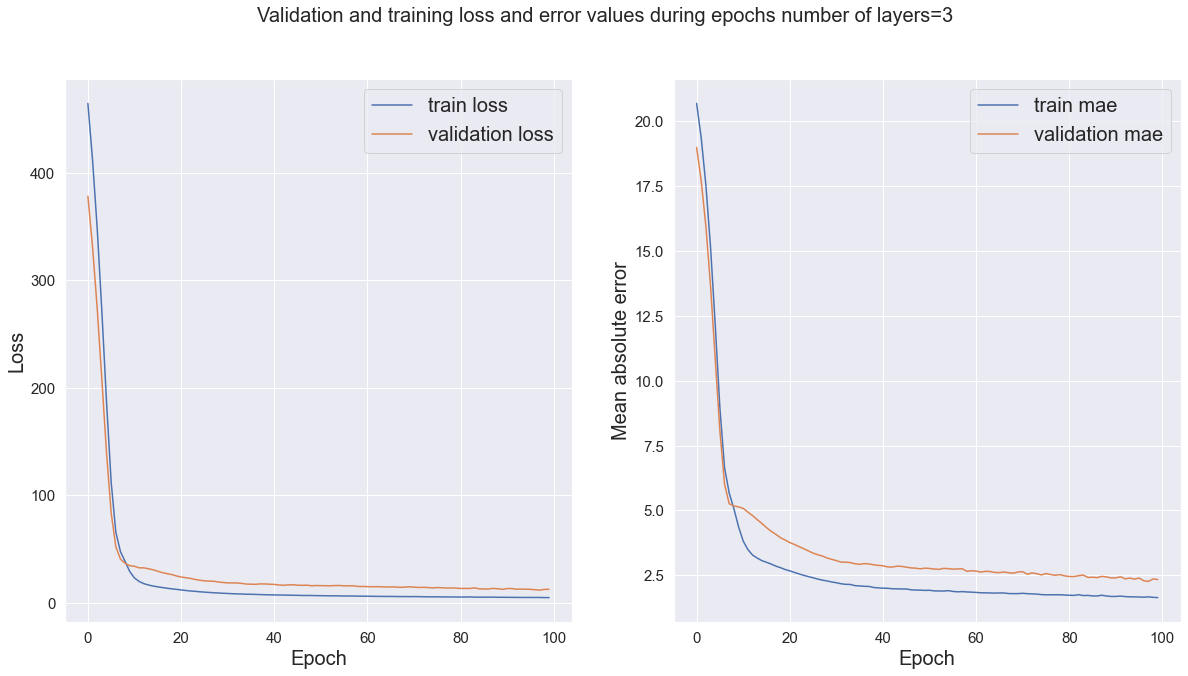

In [67]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=3',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [68]:
mse_nn, mae_nn = model.evaluate(X_test_NNS, Y_test_NN)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 997us/step - loss: 10.0061 - mae: 2.3804
Model test performance:

MSE is 10.00610637664795
RMSE is 3.163243015743171
MAE is 2.3803513050079346


### DNN tree layers with standard scaler

In [69]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
#model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
output (Dense)               (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [70]:
X_train_NNs, X_test_NNs, Y_train_NNs, Y_test_NNs = train_test_split(bostonS.loc[:, bostonS.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'], test_size = 0.25, random_state=42)
print(X_train_All_dim.shape)
print(X_test_All_dim.shape)
print(Y_train_All_dim.shape)
print(Y_test_All_dim.shape)

(305, 13)
(77, 13)
(305, 1)
(77, 1)


In [71]:
history = model.fit(X_train_NNs, Y_train_NNs, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 16ms/step - loss: 475.6646 - mae: 20.9085 - val_loss: 386.3642 - val_mae: 19.1811
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 425.8359 - mae: 19.6463 - val_loss: 344.8882 - val_mae: 18.0513
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 364.9085 - mae: 17.9800 - val_loss: 291.2879 - val_mae: 16.4875
Epoch 4/100
9/9 [==============================] - 0s 2ms/step - loss: 285.9532 - mae: 15.6507 - val_loss: 224.7315 - val_mae: 14.2992
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 192.5800 - mae: 12.5170 - val_loss: 153.2605 - val_mae: 11.5904
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 109.5147 - mae: 9.0497 - val_loss: 91.8516 - val_mae: 8.7622
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 59.1226 - mae: 6.4656 - val_loss: 56.1726 - val_mae: 6.2965
Epoch 8/100
9/9 [==============================] - 0s 2ms/ste

<Figure size 864x756 with 0 Axes>

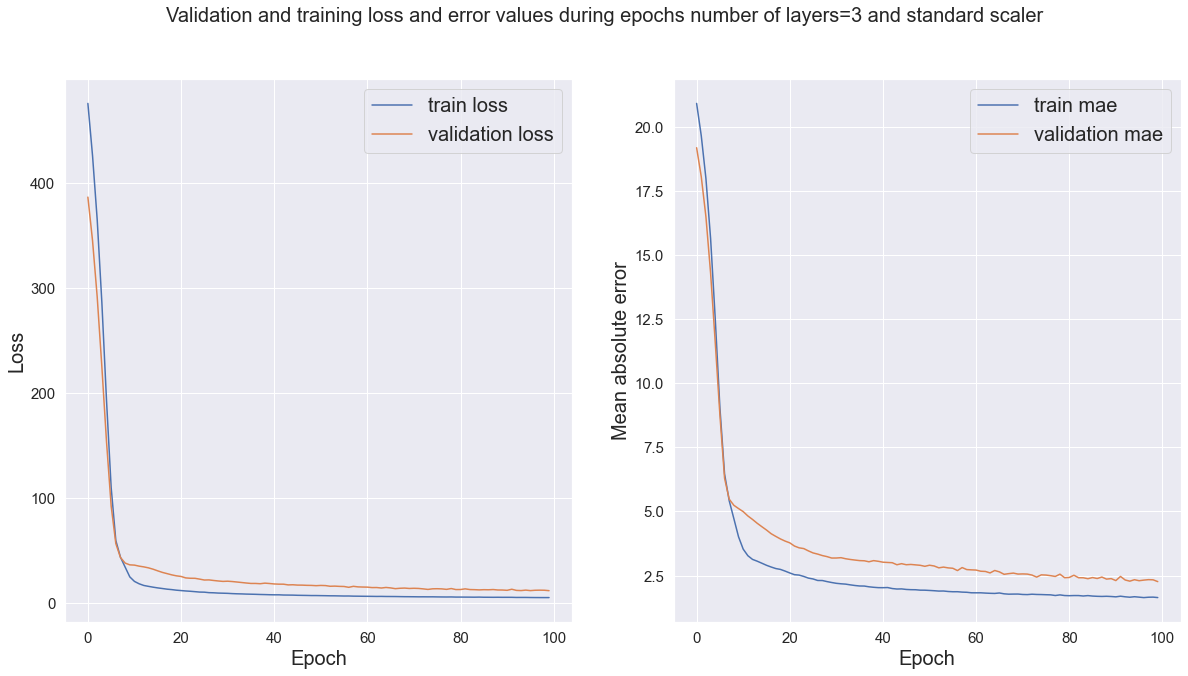

In [72]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=3 and standard scaler',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [73]:
mse_nn, mae_nn = model.evaluate(X_test_NNs, Y_test_NNs)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 997us/step - loss: 7.5736 - mae: 2.1676
Model test performance:

MSE is 7.573570728302002
RMSE is 2.752012123574677
MAE is 2.1676361560821533


### DNN four layers

In [74]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 32)                2080      
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [75]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'],test_size=0.25, random_state=42)
print(X_train_NN.shape)
print(X_test_NN.shape)
print(Y_train_NN.shape)
print(Y_test_NN.shape)

(286, 13)
(96, 13)
(286, 1)
(96, 1)


In [76]:
X_train_NNS = (X_train_NN-X_train_NN.mean(axis=0))/X_train_NN.std(axis=0)
X_test_NNS = (X_test_NN-X_test_NN.mean(axis=0))/X_test_NN.std(axis=0)

In [77]:
history = model.fit(X_train_NNS, Y_train_NN, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 19ms/step - loss: 470.0471 - mae: 20.8564 - val_loss: 377.5337 - val_mae: 18.9890
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 404.1948 - mae: 19.2528 - val_loss: 320.2436 - val_mae: 17.4184
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 317.9859 - mae: 16.8641 - val_loss: 234.7845 - val_mae: 14.7369
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 195.5351 - mae: 12.6430 - val_loss: 125.9921 - val_mae: 10.2322
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 85.6496 - mae: 7.4853 - val_loss: 49.4169 - val_mae: 5.5132
Epoch 6/100
9/9 [==============================] - 0s 2ms/step - loss: 56.5348 - mae: 6.1407 - val_loss: 35.4461 - val_mae: 5.1297
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 41.5117 - mae: 5.2571 - val_loss: 33.4832 - val_mae: 4.8405
Epoch 8/100
9/9 [==============================] - 0s 3ms/step - l

<Figure size 864x756 with 0 Axes>

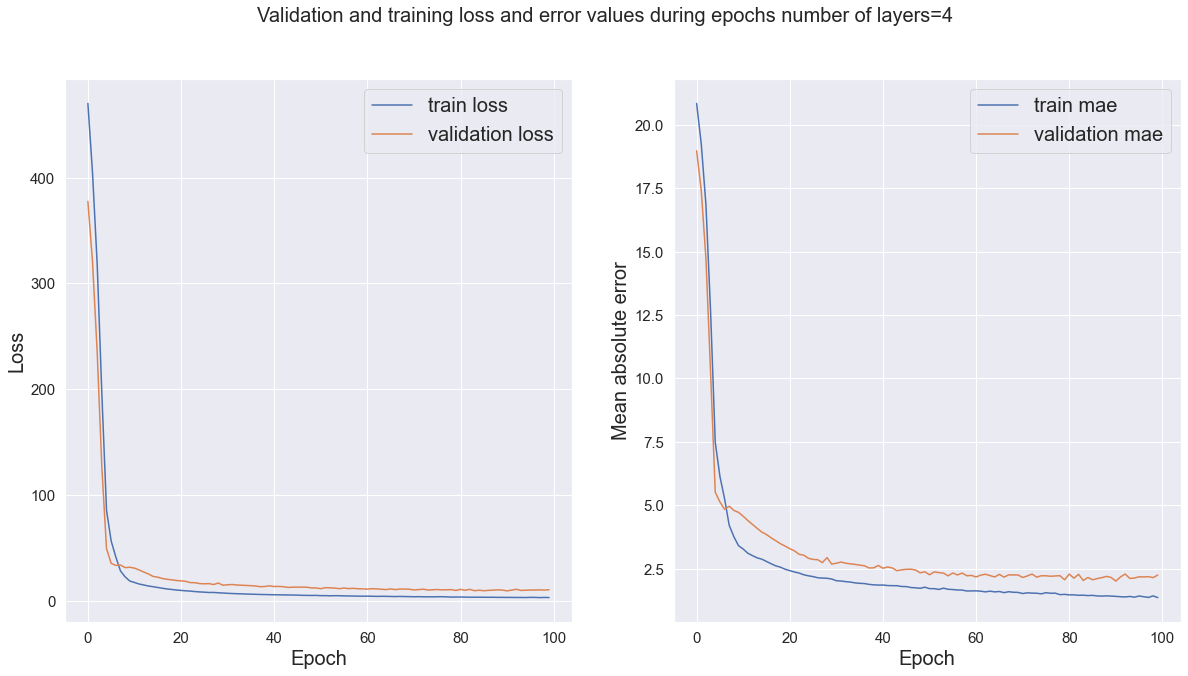

In [78]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=4',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [79]:
mse_nn, mae_nn = model.evaluate(X_test_NNS, Y_test_NN)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 1ms/step - loss: 10.6942 - mae: 2.2202
Model test performance:

MSE is 10.694235801696777
RMSE is 3.270204244645398
MAE is 2.2201507091522217


### DNN five layers

In [80]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(16, activation='relu', name='dense_layer_4'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_4 (Dense)        (None, 16)                528       
_________________________________________________________________
output (Dense)               (None, 1)                 17        
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [81]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'],test_size=0.25, random_state=42)
print(X_train_NN.shape)
print(X_test_NN.shape)
print(Y_train_NN.shape)
print(Y_test_NN.shape)

(286, 13)
(96, 13)
(286, 1)
(96, 1)


In [82]:
X_train_NNS = (X_train_NN-X_train_NN.mean(axis=0))/X_train_NN.std(axis=0)
X_test_NNS = (X_test_NN-X_test_NN.mean(axis=0))/X_test_NN.std(axis=0)

In [83]:
history = model.fit(X_train_NNS, Y_train_NN, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 18ms/step - loss: 484.7647 - mae: 21.1850 - val_loss: 403.5944 - val_mae: 19.6443
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 453.4995 - mae: 20.4272 - val_loss: 372.6397 - val_mae: 18.8407
Epoch 3/100
9/9 [==============================] - 0s 2ms/step - loss: 399.3978 - mae: 19.1146 - val_loss: 318.3427 - val_mae: 17.3480
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 308.0928 - mae: 16.5463 - val_loss: 227.0244 - val_mae: 14.4743
Epoch 5/100
9/9 [==============================] - 0s 2ms/step - loss: 174.7718 - mae: 11.8903 - val_loss: 108.9490 - val_mae: 9.3273
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 68.5064 - mae: 6.9367 - val_loss: 39.2533 - val_mae: 5.2666
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 56.3163 - mae: 6.0884 - val_loss: 30.9327 - val_mae: 4.8574
Epoch 8/100
9/9 [==============================] - 0s 3ms/step 

<Figure size 864x756 with 0 Axes>

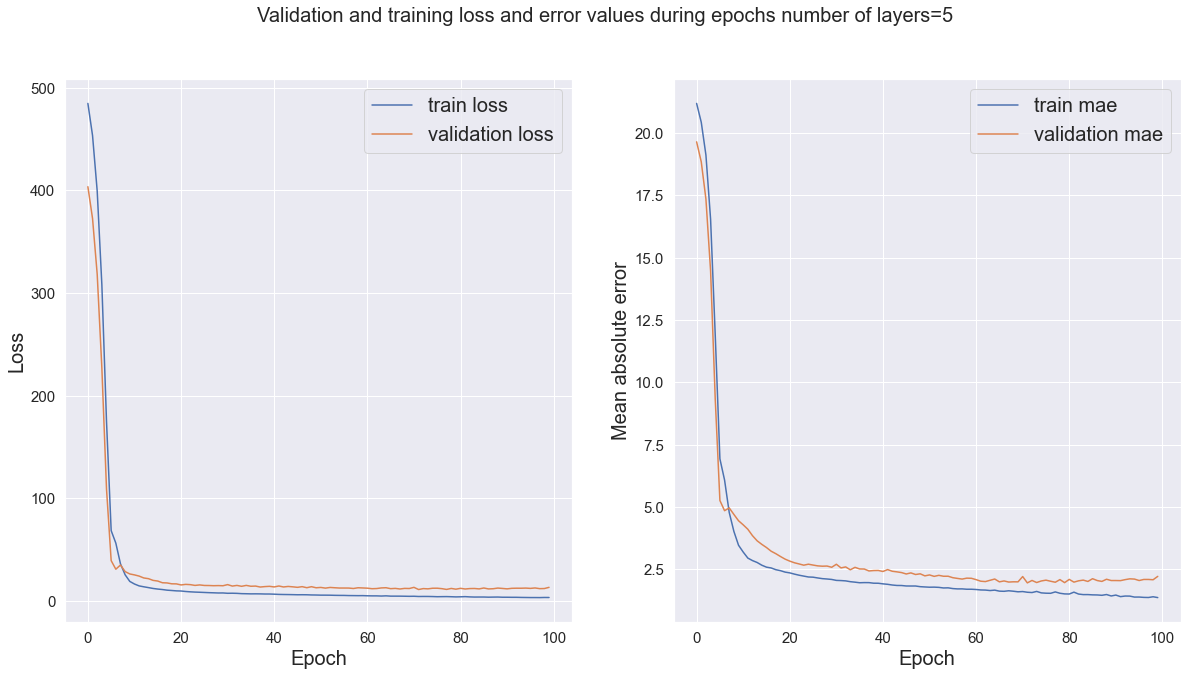

In [84]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=5',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [85]:
mse_nn, mae_nn = model.evaluate(X_test_NNS, Y_test_NN)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 1ms/step - loss: 10.6536 - mae: 2.3644
Model test performance:

MSE is 10.653647422790527
RMSE is 3.2639925586297722
MAE is 2.364393472671509


### DNN six layers

In [86]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(16, activation='relu', name='dense_layer_4'))
model.add(Dense(8, activation='relu', name='dense_layer_5'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_4 (Dense)        (None, 16)                528       
_________________________________________________________________
dense_layer_5 (Dense)        (None, 8)                 136       
_________________________________________________________________
output (Dense)               (None, 1)                 9         
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
__________________________________________________

In [87]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'],test_size=0.25, random_state=42)
print(X_train_NN.shape)
print(X_test_NN.shape)
print(Y_train_NN.shape)
print(Y_test_NN.shape)

(286, 13)
(96, 13)
(286, 1)
(96, 1)


In [88]:
X_train_NNS = (X_train_NN-X_train_NN.mean(axis=0))/X_train_NN.std(axis=0)
X_test_NNS = (X_test_NN-X_test_NN.mean(axis=0))/X_test_NN.std(axis=0)

In [89]:
history = model.fit(X_train_NNS, Y_train_NN, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 490.0778 - mae: 21.2839 - val_loss: 405.9771 - val_mae: 19.7002
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 459.5355 - mae: 20.5794 - val_loss: 376.5245 - val_mae: 18.9416
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 407.9112 - mae: 19.3168 - val_loss: 317.4796 - val_mae: 17.3001
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 311.2222 - mae: 16.6601 - val_loss: 213.5525 - val_mae: 13.9365
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 163.4659 - mae: 11.3913 - val_loss: 80.9207 - val_mae: 8.0095
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 57.4658 - mae: 6.2408 - val_loss: 26.1537 - val_mae: 4.6111
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 41.3429 - mae: 5.0487 - val_loss: 25.8498 - val_mae: 4.5522
Epoch 8/100
9/9 [==============================] - 0s 3ms/step -

<Figure size 864x756 with 0 Axes>

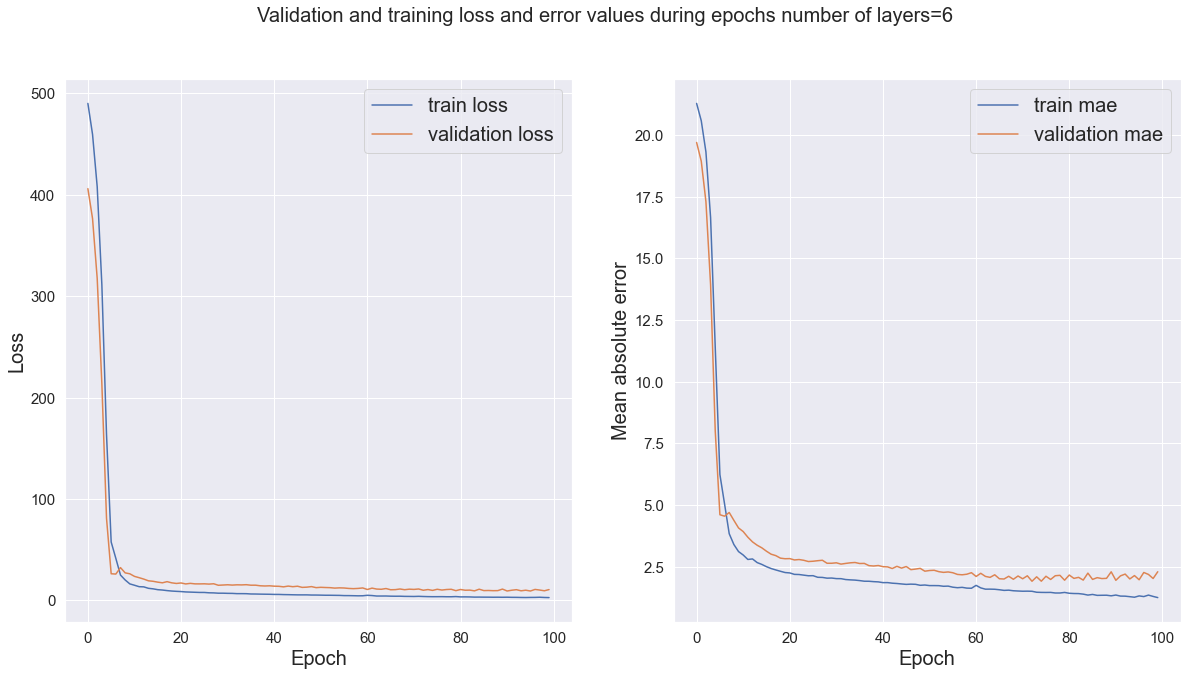

In [90]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=6',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [91]:
mse_nn, mae_nn = model.evaluate(X_test_NNS, Y_test_NN)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 1ms/step - loss: 9.8734 - mae: 2.1547
Model test performance:

MSE is 9.873435020446777
RMSE is 3.1422022564511627
MAE is 2.1546523571014404


### DNN seven layers

In [92]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(16, activation='relu', name='dense_layer_4'))
model.add(Dense(8, activation='relu', name='dense_layer_5'))
model.add(Dense(4, activation='relu', name='dense_layer_6'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_4 (Dense)        (None, 16)                528       
_________________________________________________________________
dense_layer_5 (Dense)        (None, 8)                 136       
_________________________________________________________________
dense_layer_6 (Dense)        (None, 4)                 36        
_________________________________________________________________
output (Dense)               (None, 1)                

In [93]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'],test_size=0.25, random_state=42)
print(X_train_NN.shape)
print(X_test_NN.shape)
print(Y_train_NN.shape)
print(Y_test_NN.shape)

(286, 13)
(96, 13)
(286, 1)
(96, 1)


In [94]:
X_train_NNS = (X_train_NN-X_train_NN.mean(axis=0))/X_train_NN.std(axis=0)
X_test_NNS = (X_test_NN-X_test_NN.mean(axis=0))/X_test_NN.std(axis=0)

In [95]:
history = model.fit(X_train_NNS, Y_train_NN, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 20ms/step - loss: 491.1963 - mae: 21.3169 - val_loss: 412.7491 - val_mae: 19.8774
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 470.1977 - mae: 20.8340 - val_loss: 387.7114 - val_mae: 19.2387
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 426.3915 - mae: 19.7639 - val_loss: 337.1656 - val_mae: 17.8788
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 336.2157 - mae: 17.3717 - val_loss: 238.9079 - val_mae: 14.8418
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 186.1190 - mae: 12.1862 - val_loss: 96.4827 - val_mae: 8.6386
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 76.0806 - mae: 6.9664 - val_loss: 39.3732 - val_mae: 5.4692
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 58.3226 - mae: 6.0802 - val_loss: 38.0800 - val_mae: 5.2552
Epoch 8/100
9/9 [==============================] - 0s 3ms/step -

9/9 [==============================] - 0s 3ms/step - loss: 4.8741 - mae: 1.6499 - val_loss: 12.6004 - val_mae: 2.4635
Epoch 64/100
9/9 [==============================] - 0s 3ms/step - loss: 4.5910 - mae: 1.6580 - val_loss: 11.1919 - val_mae: 2.2313
Epoch 65/100
9/9 [==============================] - 0s 3ms/step - loss: 4.4724 - mae: 1.5821 - val_loss: 12.5096 - val_mae: 2.4223
Epoch 66/100
9/9 [==============================] - 0s 3ms/step - loss: 4.5393 - mae: 1.6487 - val_loss: 11.3230 - val_mae: 2.2226
Epoch 67/100
9/9 [==============================] - 0s 3ms/step - loss: 4.3866 - mae: 1.5712 - val_loss: 11.8783 - val_mae: 2.3261
Epoch 68/100
9/9 [==============================] - 0s 3ms/step - loss: 4.2551 - mae: 1.5652 - val_loss: 11.2329 - val_mae: 2.2190
Epoch 69/100
9/9 [==============================] - 0s 3ms/step - loss: 4.2445 - mae: 1.5691 - val_loss: 11.1828 - val_mae: 2.2229
Epoch 70/100
9/9 [==============================] - 0s 3ms/step - loss: 4.1590 - mae: 1.5384 - v

<Figure size 864x756 with 0 Axes>

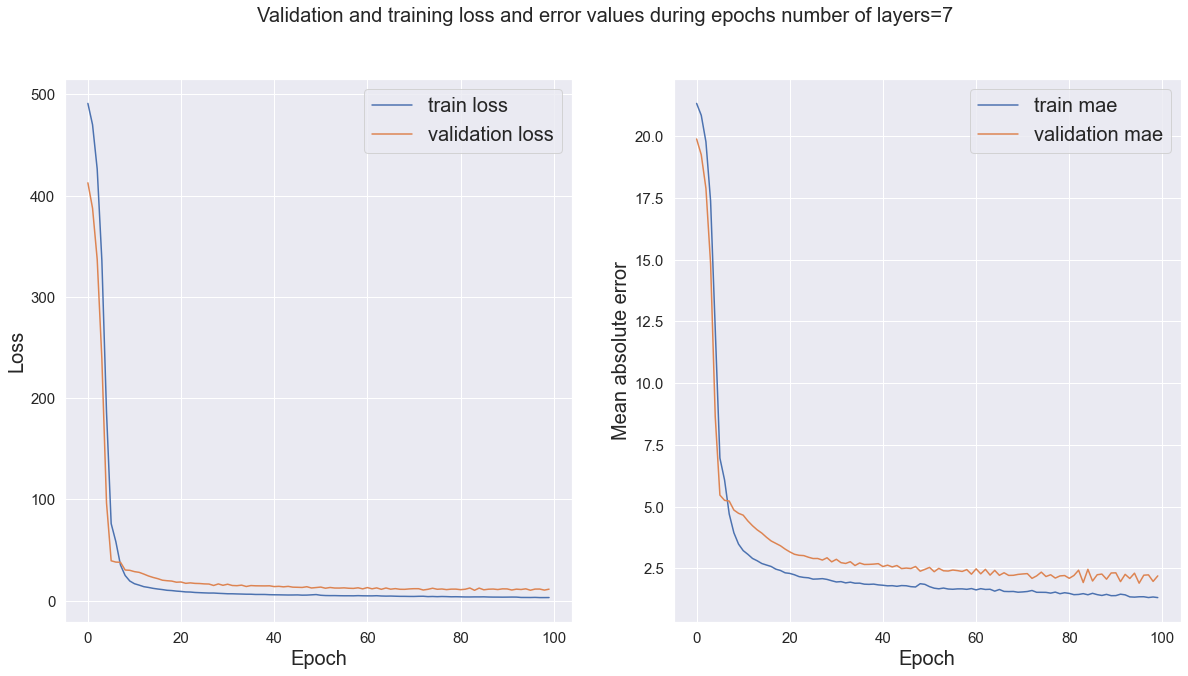

In [96]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=7',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [97]:
mse_nn, mae_nn = model.evaluate(X_test_NNS, Y_test_NN)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 1ms/step - loss: 9.2070 - mae: 2.2028
Model test performance:

MSE is 9.207023620605469
RMSE is 3.0343077662962057
MAE is 2.2028396129608154


### DNN eight layers

In [98]:
model = Sequential()
model.add(Dense(128, input_shape=(13, ), activation='relu', name='dense_layer_1'))
model.add(Dense(64, activation='relu', name='dense_layer_2'))
model.add(Dense(32, activation='relu', name='dense_layer_3'))
model.add(Dense(16, activation='relu', name='dense_layer_4'))
model.add(Dense(8, activation='relu', name='dense_layer_5'))
model.add(Dense(4, activation='relu', name='dense_layer_6'))
model.add(Dense(2, activation='relu', name='dense_layer_7'))
model.add(Dense(1, activation='linear', name='output'))
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer_1 (Dense)        (None, 128)               1792      
_________________________________________________________________
dense_layer_2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dense_layer_3 (Dense)        (None, 32)                2080      
_________________________________________________________________
dense_layer_4 (Dense)        (None, 16)                528       
_________________________________________________________________
dense_layer_5 (Dense)        (None, 8)                 136       
_________________________________________________________________
dense_layer_6 (Dense)        (None, 4)                 36        
_________________________________________________________________
dense_layer_7 (Dense)        (None, 2)                

In [99]:
X_train_NN, X_test_NN, Y_train_NN, Y_test_NN = train_test_split(boston.loc[:, boston.columns != "MEDV"], boston.loc[:, boston.columns == 'MEDV'],test_size=0.25, random_state=42)
print(X_train_NN.shape)
print(X_test_NN.shape)
print(Y_train_NN.shape)
print(Y_test_NN.shape)

(286, 13)
(96, 13)
(286, 1)
(96, 1)


In [100]:
X_train_NNS = (X_train_NN-X_train_NN.mean(axis=0))/X_train_NN.std(axis=0)
X_test_NNS = (X_test_NN-X_test_NN.mean(axis=0))/X_test_NN.std(axis=0)

In [101]:
history = model.fit(X_train_NNS, Y_train_NN, epochs=100, validation_split=0.05)

Epoch 1/100
9/9 [==============================] - 0s 23ms/step - loss: 495.1338 - mae: 21.4157 - val_loss: 420.5542 - val_mae: 20.0755
Epoch 2/100
9/9 [==============================] - 0s 3ms/step - loss: 486.0393 - mae: 21.2124 - val_loss: 407.6290 - val_mae: 19.7434
Epoch 3/100
9/9 [==============================] - 0s 3ms/step - loss: 463.8401 - mae: 20.6710 - val_loss: 381.2173 - val_mae: 19.0555
Epoch 4/100
9/9 [==============================] - 0s 3ms/step - loss: 413.5787 - mae: 19.4220 - val_loss: 323.2495 - val_mae: 17.4409
Epoch 5/100
9/9 [==============================] - 0s 3ms/step - loss: 309.0905 - mae: 16.4606 - val_loss: 205.8946 - val_mae: 13.5766
Epoch 6/100
9/9 [==============================] - 0s 3ms/step - loss: 137.7368 - mae: 10.1529 - val_loss: 63.0139 - val_mae: 6.9431
Epoch 7/100
9/9 [==============================] - 0s 3ms/step - loss: 57.6493 - mae: 6.0982 - val_loss: 36.0350 - val_mae: 5.3404
Epoch 8/100
9/9 [==============================] - 0s 3ms/st

<Figure size 864x756 with 0 Axes>

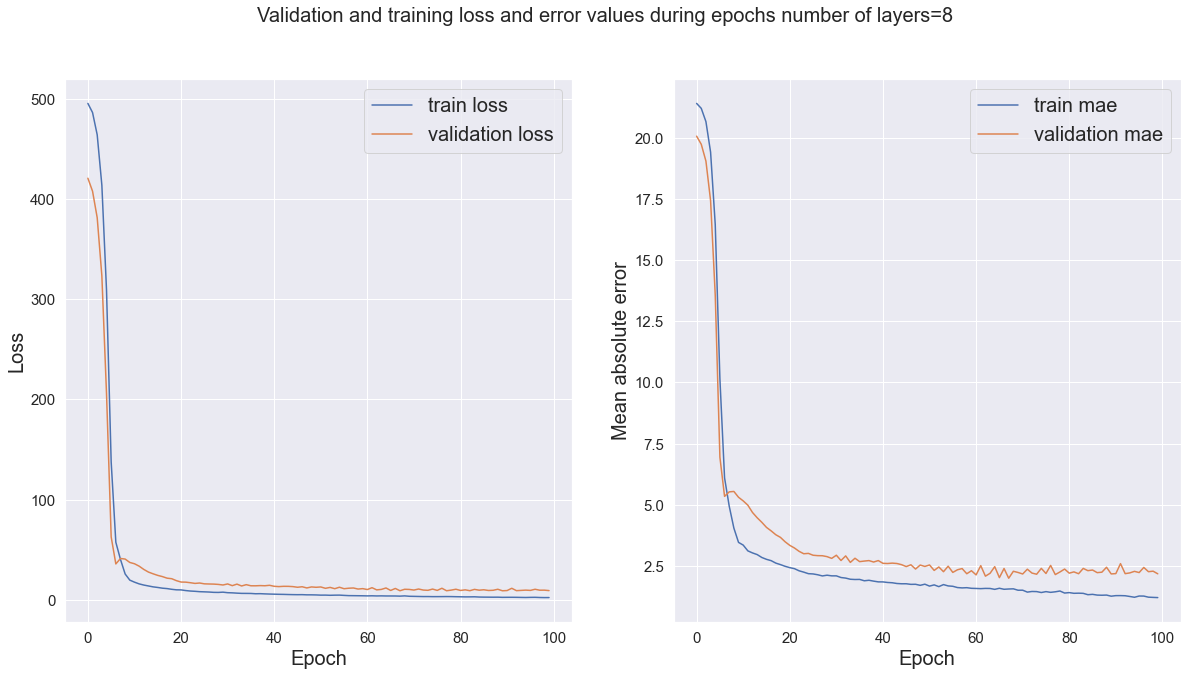

In [102]:
fig = plt.figure()
fig, axs = plt.subplots(1,2,figsize=(20,10))
fig.suptitle('Validation and training loss and error values during epochs number of layers=8',fontsize=20)
axs[0].plot(history.history['loss'], label="train loss")
axs[0].plot(history.history['val_loss'], label="validation loss")
axs[1].plot(history.history['mae'], label="train mae")
axs[1].plot(history.history['val_mae'], label="validation mae")
axs[0].set_xlabel("Epoch", fontsize = 20)
axs[0].set_ylabel("Loss", fontsize = 20)
axs[1].set_xlabel("Epoch", fontsize = 20)
axs[1].set_ylabel("Mean absolute error", fontsize = 20)
axs[0].legend(loc="upper right",fontsize=20)
axs[1].legend(loc="upper right",fontsize=20)
axs[0].tick_params(labelsize=15)
axs[1].tick_params(labelsize=15)

In [103]:
mse_nn, mae_nn = model.evaluate(X_test_NNS, Y_test_NN)
print("Model test performance:\n")
print('MSE is {}'.format(mse_nn))
print('RMSE is {}'.format(np.sqrt(mse_nn)))
print('MAE is {}'.format(mae_nn))

3/3 [==============================] - 0s 1ms/step - loss: 8.4866 - mae: 2.0794
Model test performance:

MSE is 8.486583709716797
RMSE is 2.9131741639862176
MAE is 2.0793709754943848
